In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_json("data\\cluster_data.json")

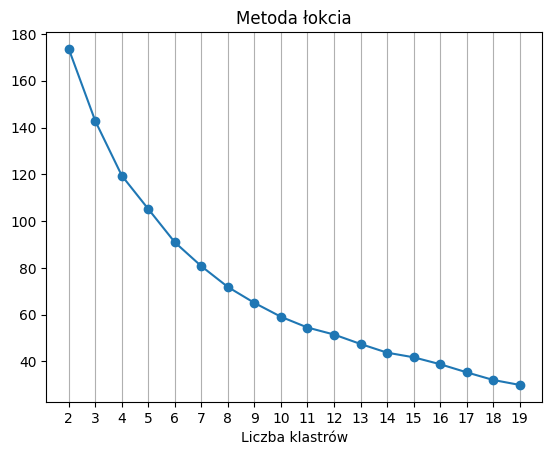

In [3]:
potencjalne_klastry = range(2, 20)
łokieć = []
for k in potencjalne_klastry:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=50)
    kmeans.fit_predict(df)
    łokieć.append(kmeans.inertia_)
plt.plot(potencjalne_klastry, łokieć, marker="o")
plt.xlabel("Liczba klastrów")
plt.title("Metoda łokcia")
plt.grid(True, axis="x")
plt.xticks(range(2, 20, 1))
plt.show()

**Silhouette dla poszczególnej ilości klastrów**

In [10]:
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=1, n_init=50)
    df["Klaster"] = kmeans.fit_predict(df)
    print(f"liczba klastórw: {i}, wynik silhouette dla niej:", silhouette_score(df.drop(columns="Klaster"), df["Klaster"]))

liczba klastórw: 2, wynik silhouette dla niej: 0.0904818529288713
liczba klastórw: 3, wynik silhouette dla niej: 0.29634402531978365
liczba klastórw: 4, wynik silhouette dla niej: 0.3475575077158838
liczba klastórw: 5, wynik silhouette dla niej: 0.3654473427055536
liczba klastórw: 6, wynik silhouette dla niej: 0.40720596627787703
liczba klastórw: 7, wynik silhouette dla niej: 0.42258067590442416
liczba klastórw: 8, wynik silhouette dla niej: 0.46190867102648436
liczba klastórw: 9, wynik silhouette dla niej: 0.47131779831711385
liczba klastórw: 10, wynik silhouette dla niej: 0.48762379851577603
liczba klastórw: 11, wynik silhouette dla niej: 0.4901376432932673
liczba klastórw: 12, wynik silhouette dla niej: 0.4983499641751045
liczba klastórw: 13, wynik silhouette dla niej: 0.528609019065282
liczba klastórw: 14, wynik silhouette dla niej: 0.537216751867543
liczba klastórw: 15, wynik silhouette dla niej: 0.5516279292507938
liczba klastórw: 16, wynik silhouette dla niej: 0.5718062607764145

In [4]:
ilosc_klastow = 14
kmeans = KMeans(n_clusters=ilosc_klastow, random_state=1, n_init=50)
df["Klaster"] = kmeans.fit_predict(df)

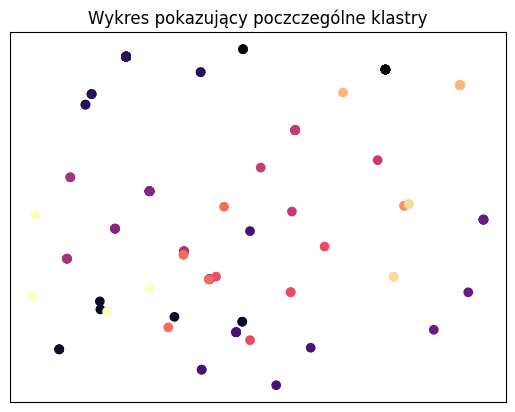

Silhouette Score:  0.55121946280187


In [5]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns="Klaster"))
plt.scatter(df_pca[:, 1], df_pca[:, 0], c=df["Klaster"], cmap="magma", marker="o")
plt.xticks([])
plt.yticks([])
plt.title("Wykres pokazujący poczczególne klastry")
plt.show()
score = silhouette_score(df.drop(columns="Klaster"), df["Klaster"])
print("Silhouette Score: ", score)